# Homework Assignment 4 - Evan Callaghan

## 1. What is a perceptron?

#### A perceptron is a neural network with a single layer of input neurons followed by a binary classification output based on the sign function. When a sample is misclassified in the training process, the estimated weight coefficients that correspond to the input values are corrected proportional to the error. This is an iterative process, and the weight coefficients slowly converge to their optimal value (making the best predictions).

## 2. What are the different types of perceptrons?

#### The first type of perceptron is a single layer perceptron (SLP). SLPs are the simpliest form of neural networks and can learn only linear binary classification. That is, the model uses a single hyperplane line to classify the inputs. The second type of perceptron is a multi-layer perceptron (MLP). MLPs have the ability to use several layers while classifying inputs, leading to a highly non-linear combination. Classifying inputs using several layers at a time also increases the processing power of the algorithm.

## 3. What is a hard margin in a support vector machine model?

#### In a support vector machine model, a hard margin is a classifier that is used primarily on data that is linearly seperable. It creates a very rigid line to seperate the observations in the training set, ultimately resulting in over-fitting the data.


## 4. The effectiveness of a support vector machine model depends on:

#### D. The effectiveness of a support vector machine model depends on the kernel, kernel parameters, and penalty cost parameter.


## 5. What is/are true about kernel in Support Vector Machines?

#### D. Kernel functions map low dimensional data into high dimensional space, and kernel functions can also be used to measure similarity.


In [90]:
## 6. a) Using the pandas library to read the csv data file and create a data-frame called heart

import boto3
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

heart = pd.read_csv(file_content_stream)

heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [91]:
## b)  Removing observations with missing values

heart = heart.dropna().reset_index()

In [92]:
## c) Using age, currentSmoker, totChol, BMI, and heartRate as the predictor variables, and TenYearCHD as the target variable to do the following:

## Splitting the data into train (80%) and test (20%)
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


## Using MinMaxScaler to transform all the input variables in the train and test datasets to 0-1 scale
scaler = MinMaxScaler(feature_range = (0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [93]:
## Building a multi-layer perceptron model with one single hidden layer with 4 neurons (hyperbolic tangent as the activation function) and softmax 
## as the activation function for the output. Using the stochastic descent gradient as the method to estimate the weights (optimizer = ’sgd’) and 
## metrics = [’accuracy’]. Using epochs = 100 and batch size = 500 to build the model 

md1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the model and using the model to predict on the test dataset
model1 = md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 500,
               validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)


## Reporting the recall score of this model. Using 15% as the cut-off value
md1_preds = md1.predict(X_test)[:, 1]
md1_preds = np.where(md1_preds < 0.15, 0, 1)

print('Recall score of Model 1:', recall_score(Y_test, md1_preds))

Recall score of Model 1: 0.794392523364486


In [94]:
## Building a multi-layer perceptron model with one single hidden layer with 4 neurons (ReLU as the activation function) and softmax as
## the activation function for the output. Using the stochastic descent gradient as the method to estimate the weights (optimizer = ’sgd’) 
## and metrics = [’accuracy’]. Using epochs = 100 and batch size = 500 to build the model

md2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the model
model2 = md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 500,
               validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)


## Reporting the recall score of this model. Using 15% as the cut-off value
md2_preds = md2.predict(X_test)[:, 1]
md2_preds = np.where(md2_preds < 0.15, 0, 1)

print('Recall score of Model 2:', recall_score(Y_test, md2_preds))

Recall score of Model 2: 0.7757009345794392


In [95]:
## Building a support vector machine model using rbf as the kernel

## Building the model
md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

## Predicting on the test data set
md3_preds = md3.predict_proba(X_test)[:, 1]

## Using 15% as the cut-off value
md3_preds = np.where(md3_preds < 0.15, 0, 1)

## Reporting the recall of the model
print('Recall of Model 3:', recall_score(Y_test, md3_preds))

Recall of Model 3: 0.9158878504672897


In [96]:
## Building a support vector machine model using poly as the kernel

## Building the model
md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

## Predicting on the test data set
md4_preds = md4.predict_proba(X_test)[:, 1]

## Using 15% as the cut-off value
md4_preds = np.where(md4_preds < 0.15, 0, 1)

## Reporting the recall of the model
print('Recall of Model 4:', recall_score(Y_test, md4_preds))

Recall of Model 4: 0.4392523364485981


Average Recall Score Model 1: 0.5561856910433073
Average Recall Score Model 2: 0.6718674975895454
Average Recall Score Model 3: 0.6590373008127632
Average Recall Score Model 4: 0.5996964867036155


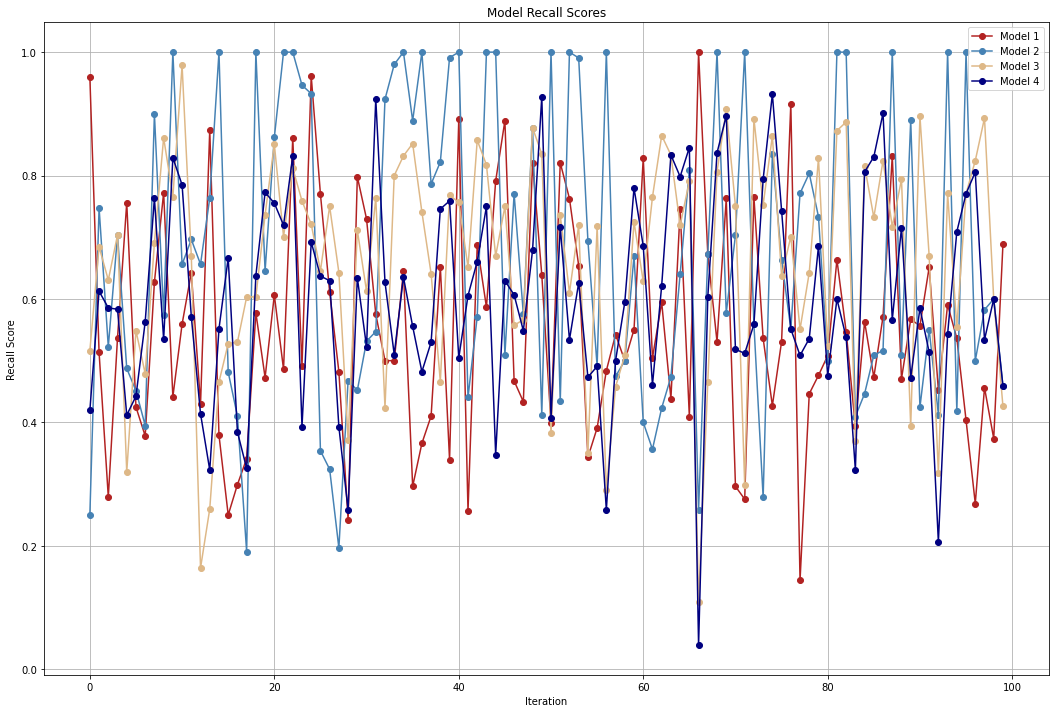

In [98]:
## d)  Repeating part (c) 100 times. Creating a visualization that shows the recall value for each of the models at each iteration. 
## Also, reporting the average recall of each of the model for the 100 repetitions


## Defining input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

## Defining empty lists to store model recall results
md1_recall = []
md2_recall = []
md3_recall = []
md4_recall = []


for i in range(0, 100):
    
    ## Splitting the data into train (80%) and test (20%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## Using MinMaxScaler to transform all the input variables in the train and test datasets to 0-1 scale
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    
    
    ## FIRST MODEL
    
    md1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    
    md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    ## Fitting the model and using the model to predict on the test dataset
    model1 = md1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 500,
                     validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)
    
    ## Reporting the recall score of this model. Using 15% as the cut-off value
    md1_preds = md1.predict(X_test)[:, 1]
    md1_preds = np.where(md1_preds < 0.15, 0, 1)
    
    md1_recall.append(recall_score(Y_test, md1_preds))
    
    
    
    ## SECOND MODEL
    
    md2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    
    md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    ## Fitting the model
    model2 = md2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), epochs = 100, batch_size = 500,
                     validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)
    
    ## Reporting the recall score of this model. Using 15% as the cut-off value
    md2_preds = md2.predict(X_test)[:, 1]
    md2_preds = np.where(md2_preds < 0.15, 0, 1)
    
    md2_recall.append(recall_score(Y_test, md2_preds))
    
    
    
    ## THIRD MODEL
    
    md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)
    
    ## Predicting on the test data set
    md3_preds = md3.predict_proba(X_test)[:, 1]
    
    ## Using 15% as the cut-off value
    md3_preds = np.where(md3_preds < 0.15, 0, 1)
    
    ## Reporting the recall of the model
    md3_recall.append(recall_score(Y_test, md3_preds))
    
    
    ## FOURTH MODEL
    
    md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)
    
    ## Predicting on the test data set
    md4_preds = md4.predict_proba(X_test)[:, 1]
    
    ## Using 15% as the cut-off value
    md4_preds = np.where(md4_preds < 0.15, 0, 1)
    
    ## Reporting the recall of the model
    md4_recall.append(recall_score(Y_test, md4_preds))


## Reporting the average recall score for each model 
print('Average Recall Score Model 1:', np.mean(md1_recall))
print('Average Recall Score Model 2:', np.mean(md2_recall))
print('Average Recall Score Model 3:', np.mean(md3_recall))
print('Average Recall Score Model 4:', np.mean(md4_recall))


## Creating a visualization that shows the recall value for each of the models at each iteration

fig = plt.figure(figsize = (18, 12))
iterations = range(0, 100)

plt.plot(iterations, md1_recall, marker = 'o', color = 'firebrick', label = 'Model 1')
plt.plot(iterations, md2_recall, marker = 'o', color = 'steelblue', label = 'Model 2')
plt.plot(iterations, md3_recall, marker = 'o', color = 'burlywood', label = 'Model 3')
plt.plot(iterations, md4_recall, marker = 'o', color = 'navy', label = 'Model 4')
plt.title('Model Recall Scores')
plt.xlabel('Iteration')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()


## We would use Model 2 (multi-layer perceptron with four neurons and relu activation function) to predict TenYearCHD because it has the highest 
## average recall score of all the considered models.